In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
%matplotlib inline

# Data Handing

## 1.Process listings.csv

In [8]:
listing_data = pd.read_csv('/content/listings.csv', usecols=['listing_id','property_type','room_type','square_feet','accommodates','bedrooms','amenities'],encoding='latin1')

In [9]:
listing_data.head(10)

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet
0,12147973,House,Entire home/apt,4,2,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN
1,3075044,Apartment,Private room,2,1,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN
2,6976,Apartment,Private room,2,1,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN
3,1436513,House,Private room,4,1,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN
4,7651065,House,Private room,2,1,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN
5,12386020,Condominium,Private room,2,1,"{""Cable TV"",""Wireless Internet"",""Air Condition...",NaN
6,5706985,Apartment,Entire home/apt,3,1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN
7,2843445,House,Private room,2,1,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN
8,753446,Condominium,Private room,2,1,"{""Wireless Internet"",""Pets live on this proper...",12
9,849408,Apartment,Entire home/apt,5,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN


In [10]:
#Delete null value
listing_data_Xna=listing_data.dropna()
listing_data_Xna

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet
8,753446,Condominium,Private room,2,1,"{""Wireless Internet"",""Pets live on this proper...",12
47,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200
50,1591827,House,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",90
52,1721016,-71.1323625,f,Apartment,2,1,Real Bed
59,735970,Bed & Breakfast,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1000
...,...,...,...,...,...,...,...
3284,8930592,House,Entire home/apt,8,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",0
3299,95453,Apartment,Entire home/apt,2,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",420
3321,10253416,Boston,MA,2134,"Boston, MA",42.36444258,-71.13058405
3448,72811,Apartment,Private room,2,1,"{""Cable TV"",""Wireless Internet"",Heating,Essent...",120


In [11]:
# Process the column[property_type]
# remove the list from column[property_type]
X_list = listing_data_Xna[~listing_data_Xna['property_type'].astype(str).str.startswith("[") & ~listing_data_Xna['property_type'].astype(str).str.endswith("]")
                         .astype(str).str.endswith("]")]
X_list

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet
8,753446,Condominium,Private room,2,1,"{""Wireless Internet"",""Pets live on this proper...",12
47,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200
50,1591827,House,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",90
52,1721016,-71.1323625,f,Apartment,2,1,Real Bed
59,735970,Bed & Breakfast,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1000
...,...,...,...,...,...,...,...
3284,8930592,House,Entire home/apt,8,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",0
3299,95453,Apartment,Entire home/apt,2,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",420
3321,10253416,Boston,MA,2134,"Boston, MA",42.36444258,-71.13058405
3448,72811,Apartment,Private room,2,1,"{""Cable TV"",""Wireless Internet"",Heating,Essent...",120


In [12]:
# Extract all strings in column[property_type]
prt_list = X_list[X_list['property_type'].str.contains("[A-Za-z]+", regex=True)]
prt_list

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet
8,753446,Condominium,Private room,2,1,"{""Wireless Internet"",""Pets live on this proper...",12
47,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200
50,1591827,House,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",90
59,735970,Bed & Breakfast,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1000
72,519272,Apartment,Private room,2,1,"{Internet,""Wireless Internet"",""Air Conditionin...",1700
...,...,...,...,...,...,...,...
3284,8930592,House,Entire home/apt,8,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",0
3299,95453,Apartment,Entire home/apt,2,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",420
3321,10253416,Boston,MA,2134,"Boston, MA",42.36444258,-71.13058405
3448,72811,Apartment,Private room,2,1,"{""Cable TV"",""Wireless Internet"",Heating,Essent...",120


In [13]:
#Process the column[room_type]
# select Entire home/apt,Private room,Shared room from column[room_type]
prt_list_room = prt_list[prt_list['room_type'].isin(['Entire home/apt', 'Private room','Shared room'])]
prt_list_room

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet
8,753446,Condominium,Private room,2,1,"{""Wireless Internet"",""Pets live on this proper...",12
47,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200
50,1591827,House,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",90
59,735970,Bed & Breakfast,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1000
72,519272,Apartment,Private room,2,1,"{Internet,""Wireless Internet"",""Air Conditionin...",1700
132,2308630,Apartment,Entire home/apt,4,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1000
152,799701,Apartment,Entire home/apt,8,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2200
209,1222327,House,Entire home/apt,4,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1500
239,336960,House,Private room,3,1,"{Internet,""Wireless Internet"",""Free Parking on...",200
379,115936,Apartment,Entire home/apt,12,4,"{TV,""Wireless Internet"",Kitchen,""Pets Allowed""...",2300


In [14]:
#Process the column[accommodates]
# select 1-20 from column[accommodates]
prt_list_room['accommodates'] = pd.to_numeric(prt_list_room['accommodates'], errors='coerce')
#errors='coerce'will replace non-numeric values with NaN
R = list(range(1, 21))
filtered_df = prt_list_room[prt_list_room['accommodates'].isin(R)]
filtered_df

<ipython-input-14-15d64c20419b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prt_list_room['accommodates'] = pd.to_numeric(prt_list_room['accommodates'], errors='coerce')


,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet
8,753446,Condominium,Private room,2,1,"{""Wireless Internet"",""Pets live on this proper...",12
47,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200
50,1591827,House,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",90
59,735970,Bed & Breakfast,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1000
72,519272,Apartment,Private room,2,1,"{Internet,""Wireless Internet"",""Air Conditionin...",1700
132,2308630,Apartment,Entire home/apt,4,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1000
152,799701,Apartment,Entire home/apt,8,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2200
209,1222327,House,Entire home/apt,4,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1500
239,336960,House,Private room,3,1,"{Internet,""Wireless Internet"",""Free Parking on...",200
379,115936,Apartment,Entire home/apt,12,4,"{TV,""Wireless Internet"",Kitchen,""Pets Allowed""...",2300


In [15]:
#Process the column[square_feet]
To_list = filtered_df['square_feet'].tolist()
sf_newList = [float(x) for x in To_list]
filtered_df['square_feet'] = sf_newList
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 8 to 3448
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_id     56 non-null     int64  
 1   property_type  56 non-null     object 
 2   room_type      56 non-null     object 
 3   accommodates   56 non-null     int64  
 4   bedrooms       56 non-null     object 
 5   amenities      56 non-null     object 
 6   square_feet    56 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.5+ KB


In [16]:
filtered_df['square_feet'].max(), filtered_df['square_feet'].min()

(2400.0, 0.0)

In [17]:
filtered_df_new = filtered_df[filtered_df['square_feet']>=120]
filtered_df_new.head()

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet
47,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0
59,735970,Bed & Breakfast,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1000.0
72,519272,Apartment,Private room,2,1,"{Internet,""Wireless Internet"",""Air Conditionin...",1700.0
132,2308630,Apartment,Entire home/apt,4,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1000.0
152,799701,Apartment,Entire home/apt,8,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2200.0


In [18]:
#Process the column[bedrooms]
# select 1-6 from column[bedrooms]
filtered_df_new['bedrooms'] = pd.to_numeric(filtered_df_new['bedrooms'], errors='coerce')
r = list(range(1, 7))
DF = filtered_df_new[filtered_df_new['bedrooms'].isin(r)]
DF

<ipython-input-18-cf3c6afb1b81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_new['bedrooms'] = pd.to_numeric(filtered_df_new['bedrooms'], errors='coerce')


,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet
47,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0
59,735970,Bed & Breakfast,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1000.0
72,519272,Apartment,Private room,2,1,"{Internet,""Wireless Internet"",""Air Conditionin...",1700.0
132,2308630,Apartment,Entire home/apt,4,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1000.0
152,799701,Apartment,Entire home/apt,8,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2200.0
209,1222327,House,Entire home/apt,4,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1500.0
239,336960,House,Private room,3,1,"{Internet,""Wireless Internet"",""Free Parking on...",200.0
379,115936,Apartment,Entire home/apt,12,4,"{TV,""Wireless Internet"",Kitchen,""Pets Allowed""...",2300.0
391,50032,Apartment,Entire home/apt,12,4,"{""Cable TV"",""Wireless Internet"",""Air Condition...",2000.0
446,1092093,Apartment,Entire home/apt,3,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1200.0


In [19]:
type(DF['amenities'])

pandas.core.series.Series

In [20]:
## Final result
DF.head()

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet
47,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0
59,735970,Bed & Breakfast,Private room,2,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1000.0
72,519272,Apartment,Private room,2,1,"{Internet,""Wireless Internet"",""Air Conditionin...",1700.0
132,2308630,Apartment,Entire home/apt,4,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1000.0
152,799701,Apartment,Entire home/apt,8,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2200.0


## 2.Process calendar.csv

In [21]:
# read data of calendar
calendar = pd.read_csv('calendar.csv',usecols=['listing_id','date','price'])
calendar.head(10)

,listing_id,date,price
0,12147973,2017-09-05,NaN
1,12147973,2017-09-04,NaN
2,12147973,2017-09-03,NaN
3,12147973,2017-09-02,NaN
4,12147973,2017-09-01,NaN
5,12147973,2017-08-31,NaN
6,12147973,2017-08-30,NaN
7,12147973,2017-08-29,NaN
8,12147973,2017-08-28,NaN
9,12147973,2017-08-27,NaN


In [22]:
# check the shape of calendar
calendar.shape

(1308890, 3)

In [23]:
# check the range of date in calendar
calendar.date.min(), calendar.date.max()

('2016-09-06', '2017-09-05')

In [24]:
# check the amount of NAN in calendar
calendar.isnull().sum()

listing_id         0
date               0
price         665853
dtype: int64

In [25]:
# remove all the NAN
calendar = calendar.dropna()
calendar.head(10)

,listing_id,date,price
365,3075044,2017-08-22,$65.00
366,3075044,2017-08-21,$65.00
367,3075044,2017-08-20,$65.00
368,3075044,2017-08-19,$75.00
369,3075044,2017-08-18,$75.00
370,3075044,2017-08-17,$65.00
371,3075044,2017-08-16,$65.00
372,3075044,2017-08-15,$65.00
373,3075044,2017-08-14,$65.00
374,3075044,2017-08-13,$65.00


In [26]:
# make sure all the format of date is correct.
calendar['date'] = pd.to_datetime(calendar['date'])

In [27]:
# confirm the information of calendar
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  643037 non-null  int64         
 1   date        643037 non-null  datetime64[ns]
 2   price       643037 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 19.6+ MB


In [28]:
# Remove the dollar mark and comma, transfer the type of price into float
calendar_list = calendar['price'].tolist()
calendar_list_new = [float(x.replace(',', '')[1:]) for x in calendar_list]
calendar['price'] = calendar_list_new
calendar.head(10)

,listing_id,date,price
365,3075044,2017-08-22,65.0
366,3075044,2017-08-21,65.0
367,3075044,2017-08-20,65.0
368,3075044,2017-08-19,75.0
369,3075044,2017-08-18,75.0
370,3075044,2017-08-17,65.0
371,3075044,2017-08-16,65.0
372,3075044,2017-08-15,65.0
373,3075044,2017-08-14,65.0
374,3075044,2017-08-13,65.0


In [29]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  643037 non-null  int64         
 1   date        643037 non-null  datetime64[ns]
 2   price       643037 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 19.6 MB


## 3.Join both tabels together

In [30]:
merged_table = pd.merge(DF, calendar, on='listing_id', how='left').dropna()
merged_table

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet,date,price
0,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0,2017-09-05,75.0
1,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0,2017-09-04,75.0
2,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0,2017-09-03,75.0
3,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0,2017-09-02,80.0
4,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0,2017-09-01,80.0
...,...,...,...,...,...,...,...,...,...
13125,72811,Apartment,Private room,2,1,"{""Cable TV"",""Wireless Internet"",Heating,Essent...",120.0,2016-09-10,62.0
13126,72811,Apartment,Private room,2,1,"{""Cable TV"",""Wireless Internet"",Heating,Essent...",120.0,2016-09-09,62.0
13127,72811,Apartment,Private room,2,1,"{""Cable TV"",""Wireless Internet"",Heating,Essent...",120.0,2016-09-08,62.0
13128,72811,Apartment,Private room,2,1,"{""Cable TV"",""Wireless Internet"",Heating,Essent...",120.0,2016-09-07,62.0


## 4.Check the tendency of data

### 4.1 Monthly average

<Axes: ylabel='date'>

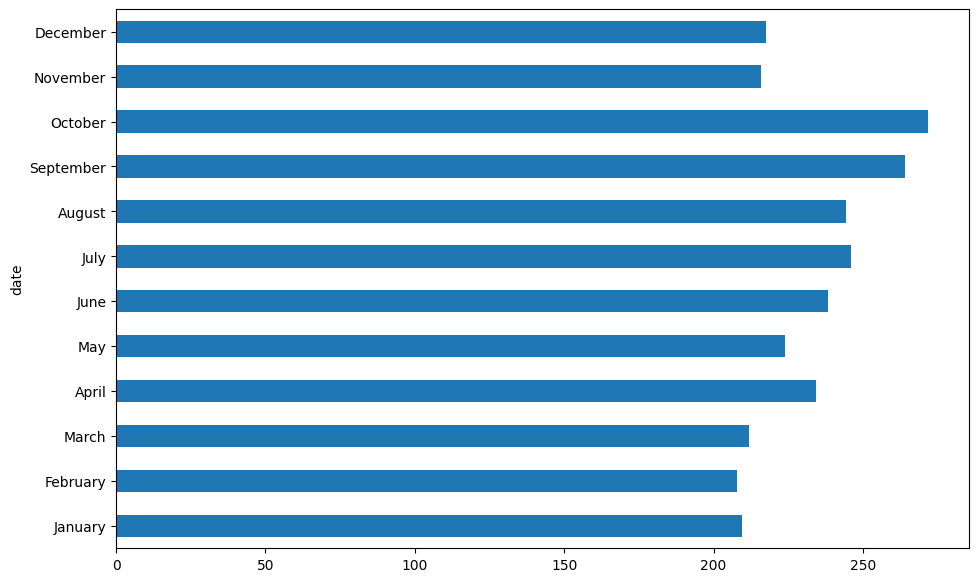

In [31]:
# check the tendency of Monthly average
M_idx= ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
Aver_M = merged_table.groupby(merged_table['date'].dt.strftime('%B'))['price'].mean().reindex(M_idx)
Aver_M.plot(kind='barh', figsize=(11,7))

### 4.2 Weekly average

In [32]:
#create a new column [weekday]
merged_table['weekday'] = merged_table.date.dt.day_name()
merged_table.head()

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet,date,price,weekday
0,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0,2017-09-05,75.0,Tuesday
1,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0,2017-09-04,75.0,Monday
2,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0,2017-09-03,75.0,Sunday
3,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0,2017-09-02,80.0,Saturday
4,1494726,House,Private room,1,1,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",200.0,2017-09-01,80.0,Friday


<ipython-input-33-f60731a96ac9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Aver_W = merged_table.groupby(['weekday']).mean().reindex(new_idx)


([<matplotlib.axis.XTick at 0x78f88b72a9b0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tues'),
  Text(2, 0, 'Weds'),
  Text(3, 0, 'Thurs'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

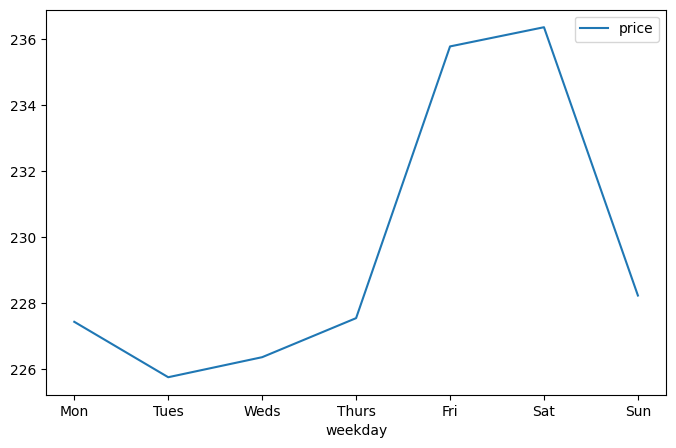

In [33]:
# check the tendency of Weekly average
new_idx= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Aver_W = merged_table[['weekday','price']]
Aver_W = merged_table.groupby(['weekday']).mean().reindex(new_idx)
draw_week =Aver_W.drop(['listing_id','accommodates','bedrooms','square_feet'], axis=1,inplace=False)
draw_week.plot(figsize=(8,5))
ticks = list(range(0,7,1))
labels =  ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks, labels)

In [34]:
#confirm the range of [price]
merged_table['price'].min(), merged_table['price'].max(), merged_table['price'].median(), merged_table['price'].mean()

(55.0, 818.0, 185.0, 229.58841904761906)

<Axes: >

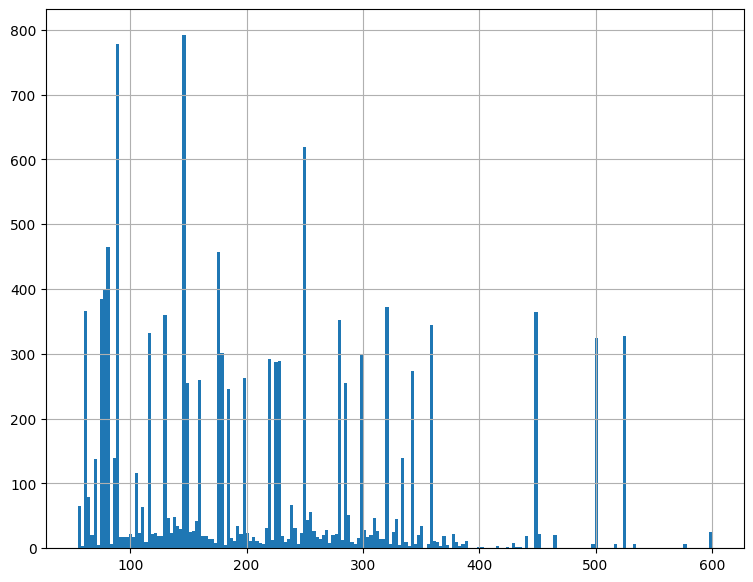

In [35]:
plt.subplots(figsize=(9,7))
merged_table.loc[(merged_table['price']<=600) & (merged_table['price']>0)]['price'].hist(bins=200)

<Axes: xlabel='room_type', ylabel='price'>

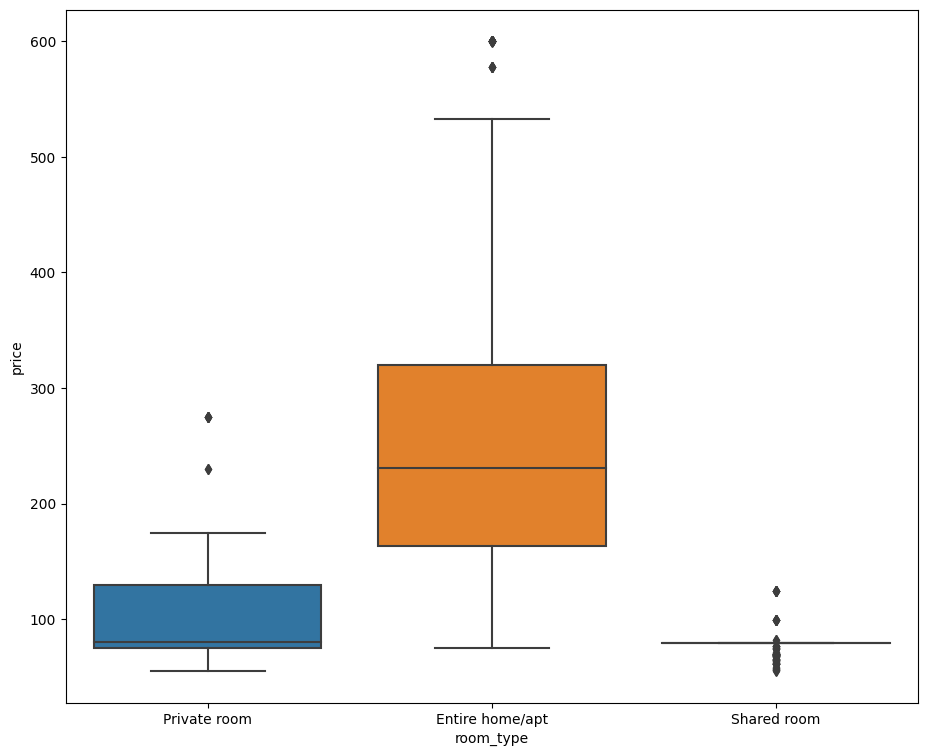

In [36]:
# Check the outlier value
plt.subplots(figsize=(11,9))
sns.boxplot(y='price', x='room_type', data=merged_table.loc[(merged_table['price']<=600) & (merged_table['price']>0)])

In [37]:
# Modify the format of ['amenities']
merged_table['amenities'].head()

0    {"Cable TV",Internet,"Wireless Internet","Air ...
1    {"Cable TV",Internet,"Wireless Internet","Air ...
2    {"Cable TV",Internet,"Wireless Internet","Air ...
3    {"Cable TV",Internet,"Wireless Internet","Air ...
4    {"Cable TV",Internet,"Wireless Internet","Air ...
Name: amenities, dtype: object

In [38]:
merged_table['amenities'] = merged_table['amenities'].str.replace('[{}]','').str.replace('"','')
merged_table['amenities'].head()

<ipython-input-38-1b8ad308a22d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_table['amenities'] = merged_table['amenities'].str.replace('[{}]','').str.replace('"','')


0    Cable TV,Internet,Wireless Internet,Air Condit...
1    Cable TV,Internet,Wireless Internet,Air Condit...
2    Cable TV,Internet,Wireless Internet,Air Condit...
3    Cable TV,Internet,Wireless Internet,Air Condit...
4    Cable TV,Internet,Wireless Internet,Air Condit...
Name: amenities, dtype: object

In [39]:
merged_table.head()

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet,date,price,weekday
0,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-05,75.0,Tuesday
1,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-04,75.0,Monday
2,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-03,75.0,Sunday
3,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-02,80.0,Saturday
4,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-01,80.0,Friday


In [40]:
merged_table.iloc[0,5]

'Cable TV,Internet,Wireless Internet,Air Conditioning,Free Parking on Premises,Pets live on this property,Cat(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Fire Extinguisher,Essentials,Hangers,Hair Dryer,Iron,Laptop Friendly Workspace'

In [41]:
# Remove the outlier value
DF_new = merged_table.loc[(merged_table['price']<=600) & (merged_table['price']>0)]
DF_new

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet,date,price,weekday
0,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-05,75.0,Tuesday
1,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-04,75.0,Monday
2,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-03,75.0,Sunday
3,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-02,80.0,Saturday
4,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-01,80.0,Friday
...,...,...,...,...,...,...,...,...,...,...
13125,72811,Apartment,Private room,2,1,"Cable TV,Wireless Internet,Heating,Essentials",120.0,2016-09-10,62.0,Saturday
13126,72811,Apartment,Private room,2,1,"Cable TV,Wireless Internet,Heating,Essentials",120.0,2016-09-09,62.0,Friday
13127,72811,Apartment,Private room,2,1,"Cable TV,Wireless Internet,Heating,Essentials",120.0,2016-09-08,62.0,Thursday
13128,72811,Apartment,Private room,2,1,"Cable TV,Wireless Internet,Heating,Essentials",120.0,2016-09-07,62.0,Wednesday


In [42]:
# OneHot Encoding
for x in ['property_type','room_type']:
    DF_new = pd.concat([DF_new, pd.get_dummies(DF_new[x])], axis=1)

In [43]:
DF_new

,listing_id,property_type,room_type,accommodates,bedrooms,amenities,square_feet,date,price,weekday,Apartment,Condominium,House,Entire home/apt,Private room,Shared room
0,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-05,75.0,Tuesday,0,0,1,0,1,0
1,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-04,75.0,Monday,0,0,1,0,1,0
2,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-03,75.0,Sunday,0,0,1,0,1,0
3,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-02,80.0,Saturday,0,0,1,0,1,0
4,1494726,House,Private room,1,1,"Cable TV,Internet,Wireless Internet,Air Condit...",200.0,2017-09-01,80.0,Friday,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,72811,Apartment,Private room,2,1,"Cable TV,Wireless Internet,Heating,Essentials",120.0,2016-09-10,62.0,Saturday,1,0,0,0,1,0
13126,72811,Apartment,Private room,2,1,"Cable TV,Wireless Internet,Heating,Essentials",120.0,2016-09-09,62.0,Friday,1,0,0,0,1,0
13127,72811,Apartment,Private room,2,1,"Cable TV,Wireless Internet,Heating,Essentials",120.0,2016-09-08,62.0,Thursday,1,0,0,0,1,0
13128,72811,Apartment,Private room,2,1,"Cable TV,Wireless Internet,Heating,Essentials",120.0,2016-09-07,62.0,Wednesday,1,0,0,0,1,0


# Modeling

## Regression

In [44]:
# The Price Prediction
# Mean squared error regression loss
# R^2(coefficient of determination) regression score function(→1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [45]:
y = DF_new ['price']
x = DF_new.drop(['price', 'property_type', 'room_type','amenities','date','weekday'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=1)

In [46]:
# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_fit = std.fit(x_train)
x_train = x_fit.transform(x_train)
x_test = x_fit.transform(x_test)

In [47]:
Tree_r = RandomForestRegressor(n_estimators=500, n_jobs=-1) #using all processors
Tree_r.fit(x_train, y_train)
y_test_predict = Tree_r.predict(x_test)

In [48]:
MSE_er = mean_squared_error(y_test, y_test_predict)**(1/2)
MSE_er

41.37967701497035

In [49]:
r_er = r2_score(y_test, y_test_predict)
r_er

0.8876360346105817

# LightGBM

In [61]:
from lightgbm import LGBMRegressor

In [66]:
set_params = {'eval_metric':'rmse',
           'eval_set':[(x_test, y_test)],
           'eval_names':['valid']}

In [67]:
lgb = LGBMRegressor(max_depth=20, num_leaves=2**17, learning_rate=0.01, n_estimators=1000, verbose = 1000,early_stopping_rounds=10)

lgb.fit(x_train, y_train, **set_params)

best_iteration = lgb.best_iteration_
print(f"The best iteration is: {best_iteration}")

[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.867942
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.450672
[LightGBM] [Debug] init for col-wise cost 0.001090 seconds, init for row-wise cost 0.001178 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 9528, number of used features: 10
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Info] Start training from score 214.159425
[LightGBM] [Warning] No

In [69]:
y_pred = lgb.predict(x_test)
y_pred

array([148.28990955, 506.59306481,  76.04677694, ..., 222.45955366,
       130.24329778, 448.98975923])

In [70]:
r2_score(y_test, y_pred)

0.8871711725825593